Name: Gargi Joshi

PRN: 21070126029

Batch: AIML A2

# Introduction

Image segmentation is a fundamental task in computer vision that involves partitioning an image into multiple segments or regions based on certain characteristics, such as color, intensity, texture, or boundaries. Unlike object detection, which identifies objects within an image as a whole, segmentation provides a pixel-level understanding of the image, assigning a label to each pixel to delineate different objects or regions. This fine-grained analysis enables various advanced image processing tasks and applications, including object recognition, scene understanding, autonomous driving, and urban planning.

Segmentation plays a crucial role in numerous fields. In medical imaging, it aids in the detection and delineation of anatomical structures, tumors, lesions, and abnormalities from medical scans such as MRI, CT, and ultrasound. In urban scene understanding, segmentation helps in semantic understanding of the environment, distinguishing between different classes of objects such as roads, buildings, pedestrians, and vehicles.

## Proposed Segmentation Project: Urban Scene Understanding using Cityscapes Dataset

For my segmentation project, I propose to focus on urban scene understanding using the Cityscapes dataset. The Cityscapes dataset is a large-scale dataset containing high-quality pixel-level annotations of urban street scenes captured from different cities, making it suitable for tasks like semantic segmentation and object detection in urban environments.

The project involves developing and training a deep learning model to perform semantic segmentation of urban street scenes from the Cityscapes dataset. Specifically, the model will be trained to classify each pixel in an input image into one of the predefined classes, such as road, sidewalk, building, vehicle, pedestrian, etc.


By successfully implementing this project, the aim is to contribute to the advancement of urban scene understanding and facilitate the development of intelligent systems for urban environments, with potential applications in urban planning, transportation management, and smart city initiatives.

# Literature Review

### Image Segmentation Using Deep Learning: A Survey - Shervin Minaee, Yuri Boykov, F. Porikli, A. Plaza, N. Kehtarnavaz, Demetri Terzopoulos (15 January 2020)

The paper categorizes the segmentation methods into ten categories based on their technical contributions and discusses the use of prominent deep learning architectures in the computer vision community. It also highlights the use of skip connections to combine semantic and appearance information for accurate segmentations and discusses the strengths, challenges, and relationships of these DL-based segmentation models. The survey covers more than 100 segmentation algorithms and provides an insightful analysis of different aspects of these algorithms performed on datasets - PASCAL VOC, Cityscape, MS COCO, ADE20k.

### Convolutional neural network based image segmentation: a review - Hina Ajmal, S. Rehman, U. Farooq, Q. Ain, F. Riaz, Ali Hassan (2018)

The paper provides a summary of the common problems in traditional scene understanding in computer vision, discusses the impact of deep learning on these problems, and reviews thirteen methods for image segmentation based on their segmentation operation. It also emphasizes the increasing importance of deep learning in image segmentation and the potential for improvement in deep learning algorithms. A summary of the frequently used framework – convolutional neural networks (CNN) is discussed. Accordingly a categorization scheme has been proposed to analyze the deep networks developed for image segmentation. Under this scheme, thirteen methods from the literature have been reviewed which are classified on the basis on how they perform segmentation operation i.e. semantic segmentation, instance segmentation and hybrid approaches. These method were reviewed from different aspects like their category, the novelty in the architecture of the method, and their special features in contrast with the traditional approaches.


### A Survey on Traditional and Graph Theoretical Techniques for Image Segmentation - R. Hegadi, Jonathan L. Gross, G. Stockman, Linda G. Shapiro, Xiaoping Cheng (2014)

The paper provides an organized survey of image segmentation techniques, categorizing them into traditional methods, graph theoretical methods, and a combination of both, highlighting their flexibility, cost-effectiveness, and computational efficiency. It discusses the modeling of images as weighted and undirected graphs, with popular algorithms such as thresholding, normalized cuts, iterated graph cut, clustering method, watershed transformation, minimum cut, grey graph cut, and minimum spanning tree-based segmentation.

### Machine Learning Techniques for Biomedical Image Segmentation: An Overview of Technical Aspects and Introduction to State-of-Art Applications - Hyunseok Seo, M. B. Khuzani, V. Vasudevan, Charles Huang, Hongyi Ren, Ruoxiu Xiao, Xiao Jia, Lei Xing (6 November 2019)

This research provides a comprehensive examination of segmentation methodologies in biomedical imaging, focusing on both classical machine learning approaches and contemporary deep learning architectures. It emphasizes the substantial advancements made in achieving precise segmentation results, particularly within supervised learning frameworks. Notably, while classical methods such as Kernel Support Vector Machines (SVMs) have demonstrated efficacy in sample-efficient learning, recent attention has predominantly shifted towards deep learning paradigms due to their superior accuracy. Challenges in training various machine learning models are acknowledged, with proposed heuristic strategies to address these obstacles. Overall, the review underscores the pivotal role of segmentation techniques in medical imaging and the evolving landscape towards deep learning-driven solutions.

### A Review on Deep Learning Approaches to Image Classification and Object Segmentation - Hao Wu, Qi Liu, Xiaodong Liu (2019)

The paper offers a comprehensive examination of recent advancements in deep learning methodologies applied to image classification and object segmentation. It delves into the profound impact of deep learning on artificial intelligence, highlighting the pivotal role of computing systems in training extensive neural networks. Moreover, it underscores the significance of high-quality datasets in facilitating the development of deep learning techniques. The study meticulously compares and evaluates various deep convolutional neural networks, emphasizing their widespread adoption in both academic research and industrial settings. Methodologically, the paper involves summarizing and contrasting different deep learning models, experimental frameworks, and datasets utilized in image classification and segmentation tasks. Notable datasets such as MNIST, JFT dataset, and COCO dataset are examined, each contributing uniquely to the progression of deep learning research.




## Importing the packages


In [4]:

import tensorflow as tf
import numpy as np
import glob
import os
from PIL import Image , ImageOps



## Downloading the Cityscape Dataset

We will download the subset of the original dataset from Kaggle.com. It's [Cityscapes Image Pairs](https://www.kaggle.com/dansbecker/cityscapes-image-pairs) by [DanB](https://www.kaggle.com/dansbecker).

In [5]:

!wget https://github.com/shubham0204/Dataset_Archives/blob/master/cityscape_images.zip?raw=true -O cityscape_images.zip
!unzip cityscape_images.zip


--2024-02-28 14:40:39--  https://github.com/shubham0204/Dataset_Archives/blob/master/cityscape_images.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/cityscape_images.zip [following]
--2024-02-28 14:40:39--  https://github.com/shubham0204/Dataset_Archives/raw/master/cityscape_images.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/cityscape_images.zip [following]
--2024-02-28 14:40:39--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/cityscape_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconte

# Basic Image Processing Techniques

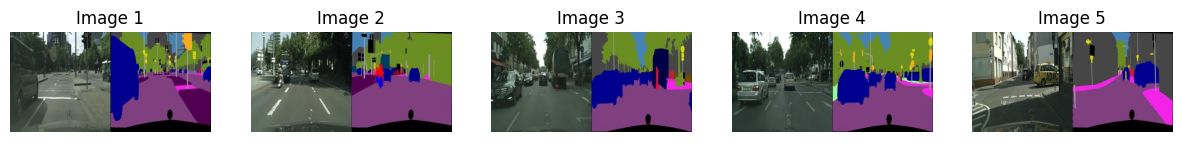

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load images from directory
def load_images_from_dir(directory, num_images=10):
    images = []
    for filename in os.listdir(directory)[:num_images]:
        filepath = os.path.join(directory, filename)
        image = cv2.imread(filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return images

# Load a subset of images from the Cityscapes dataset
image_dir = 'cityscape_images/images'
subset_images = load_images_from_dir(image_dir, num_images=5)

# Display the original images
plt.figure(figsize=(15, 6))
for i, image in enumerate(subset_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis("off")
plt.show()


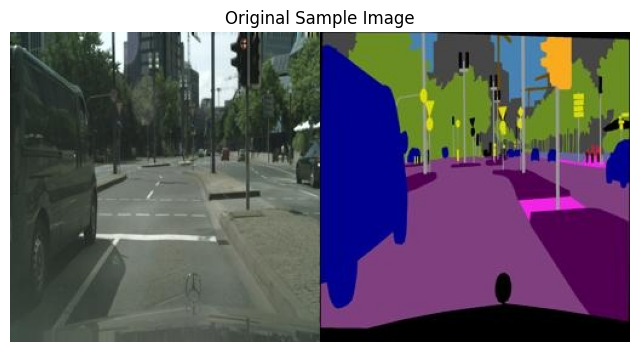

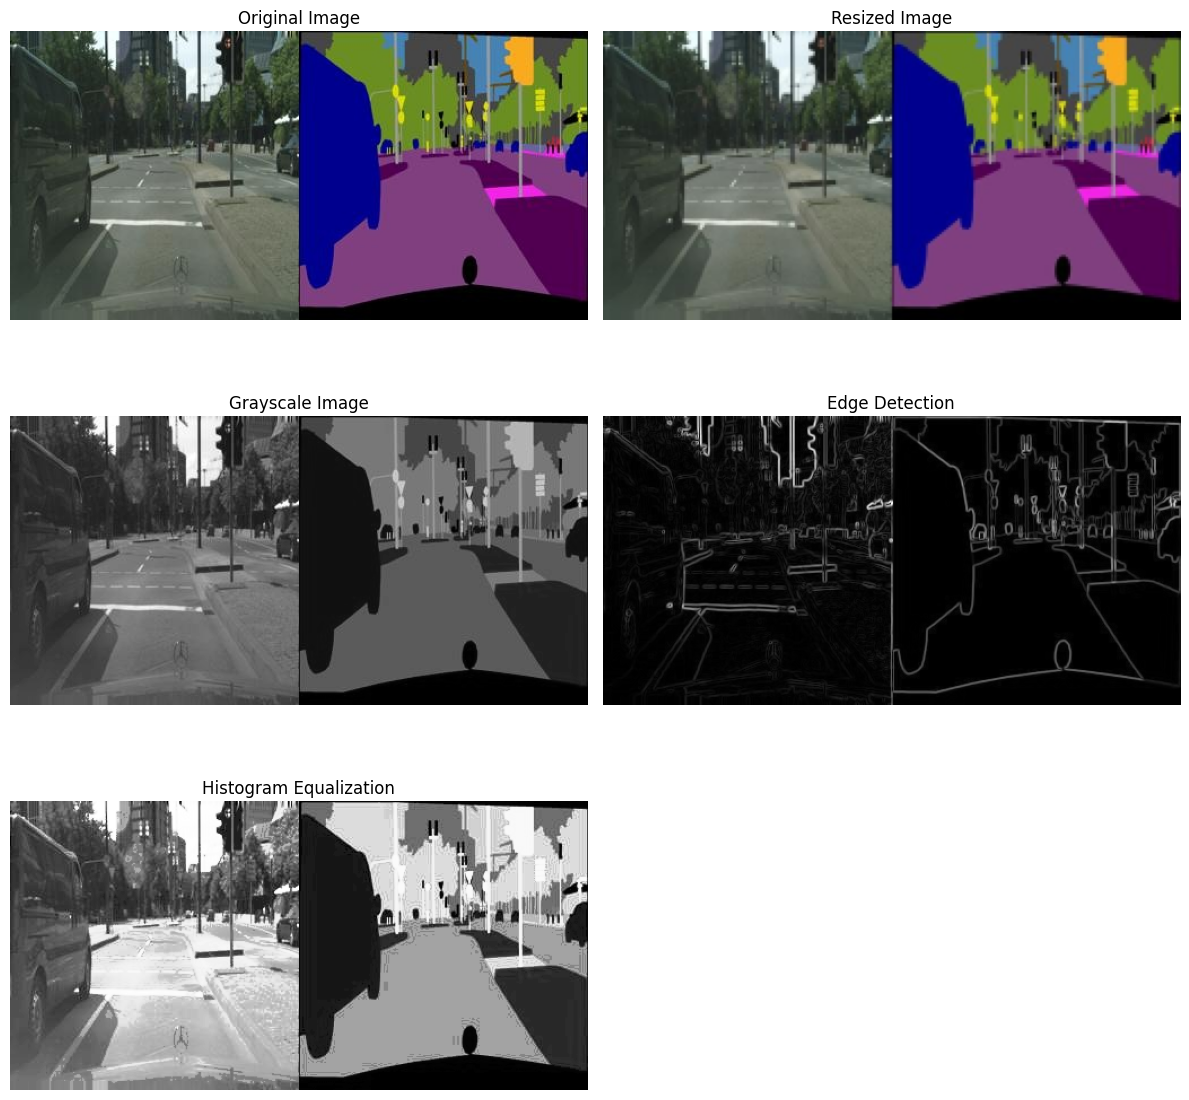

In [20]:
import os
import cv2
import numpy as np
from skimage import io, color, filters, exposure
import matplotlib.pyplot as plt

# Function to load a sample image from the Cityscapes dataset
def load_sample_image(image_dir):
    sample_image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    return sample_image

# Load a sample image from the Cityscapes dataset
image_dir = 'cityscape_images/images'
sample_image = load_sample_image(image_dir)

# Display the original sample image
plt.figure(figsize=(8, 6))
plt.imshow(sample_image)
plt.title("Original Sample Image")
plt.axis("off")
plt.show()

# Basic image processing tasks
# Resize the image
resized_image = cv2.resize(sample_image, (sample_image.shape[1] // 2, sample_image.shape[0] // 2))

# Convert the image to grayscale
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)

# Apply edge detection
edges = filters.sobel(gray_image)

# Apply histogram equalization
equalized_image = exposure.equalize_hist(gray_image)

# Display the processed images in 3 or 4 rows side by side
plt.figure(figsize=(12, 12))

# Row 1: Original Image and Resized Image
plt.subplot(3, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis("off")

# Row 2: Grayscale Image and Edge Detection
plt.subplot(3, 2, 3)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

# Row 3: Histogram Equalization
plt.subplot(3, 2, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")

plt.tight_layout()
plt.show()



# Thresholding Techniques

Processing Image 1


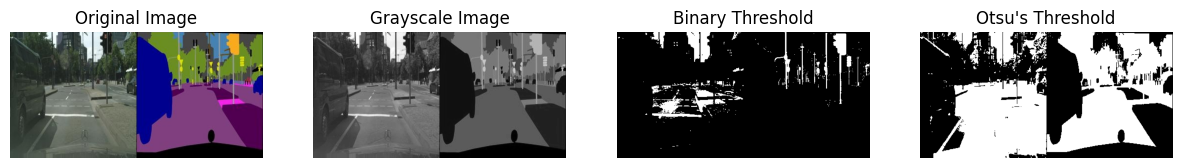

Processing Image 2


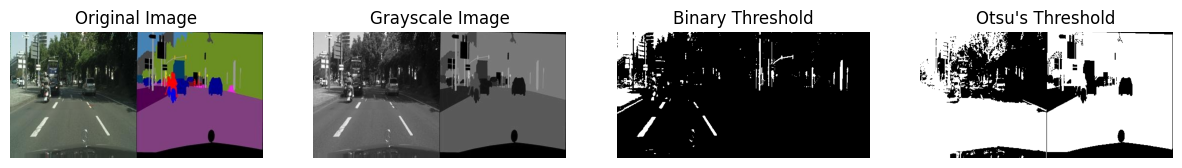

Processing Image 3


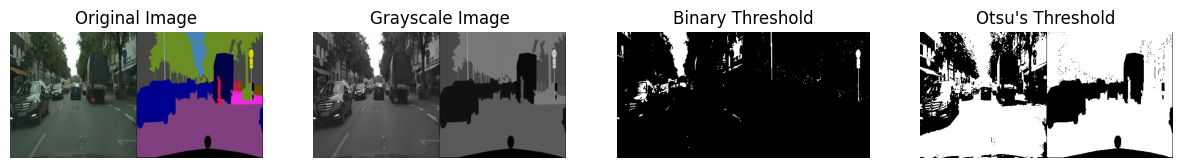

Processing Image 4


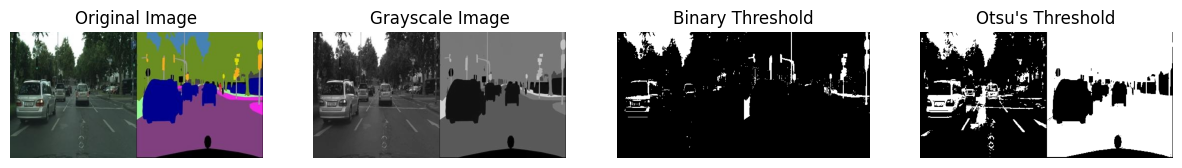

Processing Image 5


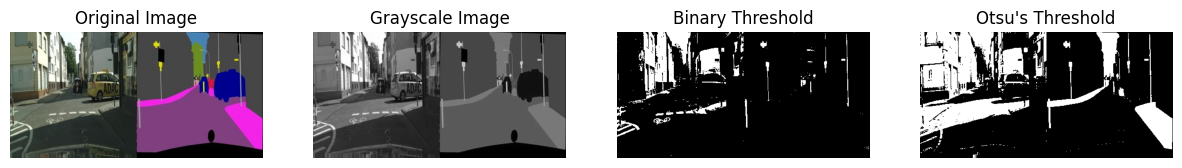

In [17]:
# Function to apply thresholding techniques and display results
def apply_thresholding(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Simple Thresholding
    _, binary_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Adaptive Thresholding
    adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Otsu's Thresholding
    _, otsu_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the results
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(binary_threshold, cmap='gray')
    plt.title("Binary Threshold")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(otsu_threshold, cmap='gray')
    plt.title("Otsu's Threshold")
    plt.axis("off")

    plt.show()

# Apply thresholding techniques on each image in the subset
for i, image in enumerate(subset_images):
    print(f"Processing Image {i+1}")
    apply_thresholding(image)


# Clustering Algorithms

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


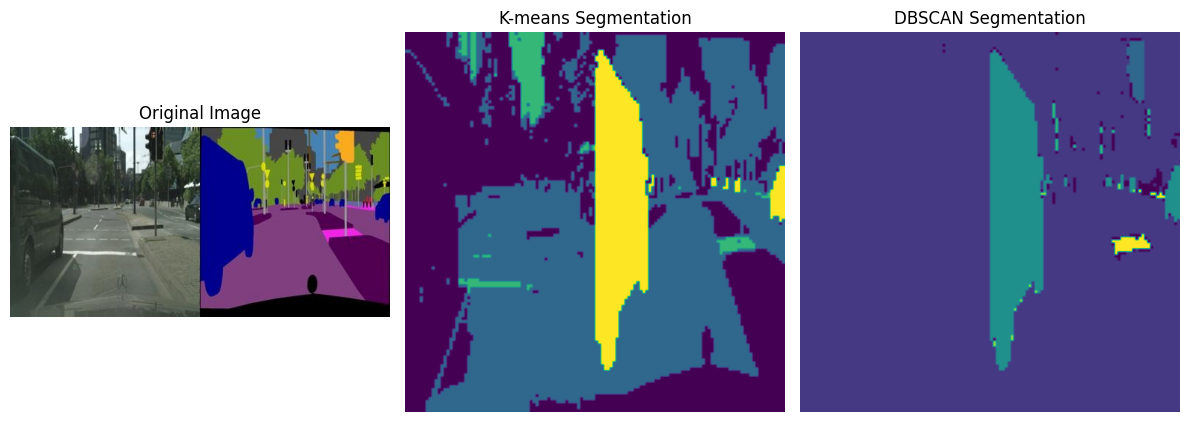

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Function to load a sample image from the Cityscapes dataset
def load_sample_image(image_dir):
    sample_image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    return sample_image

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to a smaller size for faster processing
    resized_image = cv2.resize(image, (128, 128))
    # Flatten the image to a 1D array
    flattened_image = resized_image.reshape(-1, 3)
    # Standardize the features by scaling them to have mean 0 and variance 1
    scaler = StandardScaler()
    scaled_image = scaler.fit_transform(flattened_image)
    return resized_image, scaled_image

# Load a sample image from the Cityscapes dataset
image_dir = 'cityscape_images/images'
sample_image = load_sample_image(image_dir)

# Preprocess the image
resized_image, processed_image = preprocess_image(sample_image)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(processed_image)
kmeans_labels = kmeans.labels_.reshape(resized_image.shape[:2])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(processed_image)
dbscan_labels = dbscan.labels_.reshape(resized_image.shape[:2])

# Display the segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='viridis')
plt.title("K-means Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(dbscan_labels, cmap='viridis')
plt.title("DBSCAN Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()



##  Processing the images

Here, we will split the composite image into two parts, the one which contains the mask and second which is the actual image.

- The class "road" in the mask have a colour of RGB value `( 128 , 63 , 127 )`. We will binarize the image.
- The pixels who have a RGB value of `( 128 , 63 , 127 )` will be assigned a new value of 1. Rest all the pixels will have a new value of 0.
- Hence the image shape changes from `( 128 , 128 , 3 )` to `( 128 , 128 , 1 )`.


In [6]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = list()
y = list()

#@markdown > The number of images to load from the dataset. By default 400 images are loaded.
num_images = 400 #@param {type: "number" }

image_dir = 'cityscape_images/images'
image_filenames = os.listdir( image_dir )
for filename in image_filenames[ 0 : 100 ]:
	image = Image \
		.open(os.path.join( image_dir, filename))
	x.append( np.asarray( ImageOps.crop( image , ( 0 , 0 , 256 , 0 ) ).resize( ( 128, 128 )) ) )
	y.append(np.asarray( ImageOps.crop(image, (256, 0, 0, 0)).resize( ( 128 , 128 ) ) ))

x = np.array( x ) / 255
y = np.array( y )

train_features, test_features, train_labels, test_labels = train_test_split(np.array(x), np.array(y),
																					test_size=0.4)

def binarize( pixel ):
    if np.array_equal( pixel , [ 128 , 63 , 127 ]):
        return np.array( [ 1 ] )
    else :
        return np.array( [ 0 ] )

train_labels = np.apply_along_axis( binarize , axis=3 , arr=train_labels )
test_labels = np.apply_along_axis( binarize , axis=3 , arr=test_labels )

#@markdown > The batch size for the dataset.
batch_size = 5  #@param {type: "number"}

train_dataset = tf.data.Dataset.from_tensor_slices( ( train_features , train_labels ) )
train_dataset = train_dataset.shuffle( 1024 ).batch( batch_size )
test_dataset = tf.data.Dataset.from_tensor_slices( ( test_features , test_labels ) )
test_dataset = test_dataset.shuffle( 1024 ).batch( batch_size )



##  Defining the operations

Defining methods for four operations:

1. `conv2d_down`: Regular Convolution along with Leaky ReLU activation.
2. `maxpool_down`: Max Pooling operation with valid padding.
3. `conv2d_up`: Transposed convolution for upsampling the image.
4. `maxpool_up`: Upsampling the input like the `UpSampling2D` Keras layer.


In [7]:

#@markdown > ReLU slope for `tf.nn.leaky_relu`
relu_alpha = 0.2  #@param {type: "number"}

#@markdown > Dropout rate for `tf.nn.dropout`
dropout_rate = 0.5  #@param {type: "number"}

#@markdown > The padding for the convolution layers.
padding = 'SAME' #@param [ 'SAME' , 'VALID' ]

def conv2d_down( inputs , filters , stride_size ):
    #print( 'conv2d down' )
    out = tf.nn.conv2d( inputs , filters , strides=stride_size , padding=padding )
    return tf.nn.leaky_relu( out , alpha=0.2 )

def maxpool_down( inputs , pool_size , stride_size ):
    #print( 'maxpool down' )
    return tf.nn.max_pool( inputs , ksize=pool_size , padding='VALID' , strides=stride_size )

def conv2d_up( inputs , filters , stride_size , output_shape ):
    #print( 'conv2d up' )
    out = tf.nn.conv2d_transpose( inputs , filters , output_shape=output_shape , strides=stride_size , padding=padding )
    return tf.nn.leaky_relu( out , alpha=0.2 )

def maxpool_up( inputs , size ):
    #print( 'maxpool up' )
    in_dimen = tf.shape( inputs )[ 1 ]
    out_dimen = tf.cast( tf.round( in_dimen * size ) , dtype=tf.int32 )
    return tf.image.resize( inputs , [ out_dimen , out_dimen ] , method='nearest' )



## Initializing the weights

Initializing the weights for our UNet model with Glorot Uniform initializer.


In [8]:

initializer = tf.initializers.glorot_uniform()
def get_weight( shape , name ):
    return tf.Variable( initializer( shape ) , name=name , trainable=True )

shapes = [
    [ 3 , 3 , 3 , 16 ] ,
    [ 3 , 3 , 16 , 16 ] ,

    [ 3 , 3 , 16 , 32 ] ,
    [ 3 , 3 , 32 , 32 ] ,

    [ 3 , 3 , 32 , 64 ] ,
    [ 3 , 3 , 64 , 64 ] ,

    [ 3 , 3 , 64 , 128 ] ,
    [ 3 , 3 , 128 , 128 ] ,

    [ 3 , 3 , 128 , 256 ] ,
    [ 3 , 3 , 256 , 256 ] ,

    [ 3 , 3 , 128 , 384 ],
    [ 3 , 3 , 128 , 128 ],

    [ 3 , 3 , 64 , 192 ],
    [ 3 , 3 , 64 , 64 ],

    [ 3 , 3 , 32 , 96 ],
    [ 3 , 3 , 32 , 32 ],

    [ 3 , 3 , 16 , 48 ],
    [ 3 , 3 , 16 , 16 ],

    [ 1 , 1 , 16 , 1 ],
]

weights = []
for i in range( len( shapes ) ):
    weights.append( get_weight( shapes[ i ] , 'weight{}'.format( i ) ) )


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(



## Assembling the model

To create the final UNet model, we will assemble all the operations together.

In [9]:

def model( x ) :
    batch_size = tf.shape( x )[0]
    x = tf.cast( x , dtype=tf.float32 )
    c1 = conv2d_down( x , weights[ 0 ] , stride_size=1 )
    c1 = conv2d_down( c1 , weights[ 1 ] , stride_size=1 )
    p1 = maxpool_down( c1 , pool_size=2 , stride_size=2 )

    c2 = conv2d_down( p1 , weights[ 2 ] , stride_size=1 )
    c2 = conv2d_down( c2 , weights[ 3 ] , stride_size=1 )
    p2 = maxpool_down( c2 , pool_size=2 , stride_size=2 )

    c3 = conv2d_down( p2 , weights[ 4 ] , stride_size=1 )
    c3 = conv2d_down( c3 , weights[ 5 ] , stride_size=1 )
    p3 = maxpool_down( c3 , pool_size=2 , stride_size=2 )

    c4 = conv2d_down( p3 , weights[ 6 ] , stride_size=1 )
    c4 = conv2d_down( c4 , weights[ 7 ] , stride_size=1 )
    p4 = maxpool_down( c4 , pool_size=2 , stride_size=2 )

    c5 = conv2d_down( p4 , weights[ 8 ] , stride_size=1 )
    c5 = conv2d_down( c5 , weights[ 9 ] , stride_size=1 )

    p5 = maxpool_up( c5 , 2 )
    concat_1 = tf.concat( [ p5 , c4 ] , axis=-1 )
    c6 = conv2d_up( concat_1 , weights[ 10 ] , stride_size=1 , output_shape=[ batch_size , 16 , 16 , 128 ] )
    c6 = conv2d_up( c6 , weights[ 11 ] , stride_size=1 , output_shape=[ batch_size , 16 , 16 , 128 ] )

    p6 = maxpool_up( c6 , 2 )
    concat_2 = tf.concat( [ p6 , c3 ] , axis=-1 )
    c7 = conv2d_up( concat_2 , weights[ 12 ] , stride_size=1 , output_shape=[ batch_size , 32 , 32 , 64 ] )
    c7 = conv2d_up( c7 , weights[ 13 ] , stride_size=1 , output_shape=[ batch_size , 32 , 32 , 64 ] )

    p7 = maxpool_up( c7 , 2 )
    concat_3 = tf.concat( [ p7 , c2 ] , axis=-1 )
    c8 = conv2d_up( concat_3 , weights[ 14 ] , stride_size=1 , output_shape=[ batch_size , 64 , 64 , 32 ] )
    c8 = conv2d_up( c8 , weights[ 15 ] , stride_size=1 , output_shape=[ batch_size , 64 , 64 , 32 ] )

    p8 = maxpool_up( c8 , 2 )
    concat_4 = tf.concat( [ p8 , c1 ] , axis=-1 )
    c9 = conv2d_up( concat_4 , weights[ 16 ] , stride_size=1 , output_shape=[ batch_size , 128 , 128 , 16 ] )
    c9 = conv2d_up( c9 , weights[ 17 ] , stride_size=1 , output_shape=[ batch_size , 128 , 128 , 16 ] )

    output = tf.nn.conv2d( c9 , weights[ 18 ] , strides=[ 1 , 1 , 1 , 1 ] , padding=padding )
    outputs = tf.nn.sigmoid( output )
    return outputs



## Optimization and Training

We will use `tf.losses.binary_crossentropy` as our loss function and the `tf.optimizers.Adam` optimizer.


In [10]:

def loss( pred , target ):
    return tf.losses.binary_crossentropy( target , pred )

#@markdown > The learning rate used during optimization using Adam.
learning_rate = "0.001"  #@param [ "0.1" , "0.001" , "0.0001" , "0.05" ]
optimizer = tf.optimizers.Adam( learning_rate=float( learning_rate ) )

def train( model, inputs , outputs ):
    with tf.GradientTape() as tape:
        current_loss = loss( model( inputs ), outputs)
    grads = tape.gradient( current_loss , weights )
    optimizer.apply_gradients( zip( grads , weights ) )
    return tf.reduce_mean( current_loss )


We start training the model for a specific number of epochs and print the loss. 

In [12]:

import datetime

logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer( logdir + "/metrics")
file_writer.set_as_default()

#@markdown > Number of epochs for training the model
num_epochs = 25  #@param {type: "number"}

for e in range( num_epochs ):
    print( 'Epoch {} out of {} {}'.format( e + 1 , num_epochs , '--' * 50 ) )
    for features in train_dataset:
        image , label = features
        summ_loss = train( model , image , label )
        tf.summary.scalar('loss', data=summ_loss, step=e )


Epoch 1 out of 25 ----------------------------------------------------------------------------------------------------


Epoch 2 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 3 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 4 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 5 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 6 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 7 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 8 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 9 out of 25 ----------------------------------------------------------------------------------------------------
Epoch 10 out of 25 -----------------------------

Additionally, we can plot the image and its corresponding mask to view the results.

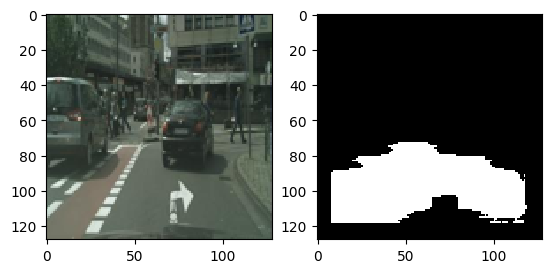

In [15]:

import matplotlib.pyplot as plt

input_image = test_features[0:1]
pred = model( input_image ).numpy()
image = np.zeros( ( 128 , 128 , 3 ) )
for x in range( 128 ):
    for y in range( 128 ):
        if pred[ 0 , x , y ] > 0.5:
            image[ x , y ] = [ 255 , 255 , 255 ]
        else:
            image[ x , y ] = [ 0, 0, 0]

def show_images(images: list):
    n = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i] , interpolation='none' )
    plt.show()

show_images( [ test_features[0] , image ] )


# Evaluation Metrics and Analysis - IoU And Dice Coefficients

In [25]:

iou_scores = []
dice_scores = []

for i in range(len(test_features)):
    input_image = test_features[i:i+1]
    true_mask = test_labels[i:i+1]

    # Obtain predicted mask using the trained model
    pred_mask = model(input_image).numpy()

    # Threshold predicted mask to get binary segmentation
    pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)

    # Calculate IoU and Dice Coefficient
    iou = calculate_iou(true_mask, pred_mask_binary)
    dice = calculate_dice_coefficient(true_mask, pred_mask_binary)

    # Append scores to lists
    iou_scores.append(iou)
    dice_scores.append(dice)

# Compute average scores
average_iou = np.mean(iou_scores)
average_dice = np.mean(dice_scores)

print("Average Intersection over Union (IoU):", average_iou)
print("Average Dice Coefficient:", average_dice)


Average Intersection over Union (IoU): 0.6467454357250441
Average Dice Coefficient: 0.7639164375483356


The performance evaluation metrics, namely Intersection over Union (IoU) and Dice Coefficient, provide valuable insights into the effectiveness of the implemented methods on the Cityscapes dataset.

- The average IoU of 0.6467 indicates a reasonable degree of overlap between the predicted segmentation masks and the ground truth masks. IoU measures the proportion of intersection between the predicted and ground truth regions relative to their union, with higher values indicating better segmentation accuracy.

- Similarly, the average Dice Coefficient of 0.7639 signifies a strong agreement between the predicted and ground truth segmentation masks. The Dice Coefficient quantifies the spatial overlap between two sets, ranging from 0 to 1, where higher values denote better agreement.

Comparing and analyzing the results reveal the strengths and weaknesses of different segmentation techniques. For instance, if one method achieves a higher IoU but a lower Dice Coefficient compared to another method, it may indicate better localization accuracy but potentially at the cost of segmentation completeness.Additionally, trade-offs between techniques may arise in terms of computational complexity, training time, and model interpretability. Deep learning models, while capable of achieving high segmentation accuracy, often require substantial computational resources and extensive labeled data for training. On the other hand, traditional machine learning approaches may offer faster inference times and better interpretability but may struggle with capturing complex patterns in the data.


# Project Reflection

During the course of this project, several key insights were gained and challenges were encountered, contributing to a deeper understanding of image segmentation and its applications:

- Dataset Understanding: Working with the Cityscapes dataset provided valuable insights into the complexities of real-world urban scenes. Understanding the diversity of objects and environmental conditions present in urban images was crucial for effective segmentation.

- Model Selection and Tuning: Choosing an appropriate deep learning architecture (e.g., U-Net, DeepLab) and optimizing its hyperparameters required careful experimentation and validation. Fine-tuning the model architecture and parameters significantly impacted segmentation performance.

- Data Preprocessing: Preprocessing the dataset, including resizing, normalization, and augmentation, was essential for enhancing model generalization and robustness. However, balancing between data augmentation techniques and maintaining the integrity of the annotations posed a challenge.

- Training and Evaluation: Training the segmentation model on large-scale datasets like Cityscapes necessitated significant computational resources and time. Efficient training strategies, such as batch normalization and early stopping, were employed to expedite convergence and prevent overfitting.

- Evaluation Metrics: Evaluating segmentation performance using metrics like Intersection over Union (IoU) and pixel accuracy provided quantitative insights into model effectiveness. Interpretation of evaluation results helped identify areas for further improvement and refinement.

- Real-world Applications: Exploring potential applications of the segmentation model in real-world scenarios, such as urban planning, autonomous driving, and traffic analysis, underscored the practical significance of the project outcomes.

# Future Steps

While the project achieved significant milestones in urban scene understanding through semantic segmentation, several avenues for future exploration and enhancement remain:

- Model Optimization: Continuously refining the segmentation model architecture and optimization techniques to achieve higher accuracy and efficiency on challenging urban scenes.

- Data Augmentation: Exploring advanced data augmentation techniques, such as geometric transformations, style transfer, and generative adversarial networks (GANs), to further diversify the training dataset and improve model robustness.

- Domain Adaptation: Investigating domain adaptation methods to enhance model generalization across different cities, weather conditions, and lighting variations, ensuring consistent performance in diverse urban environments.

- Interactive Segmentation: Integrating interactive segmentation techniques, such as semi-supervised learning and user-guided annotations, to enable human-in-the-loop interactions for refining segmentation results and addressing ambiguous cases.

- Real-time Inference: Optimizing the segmentation model for real-time inference on embedded platforms and edge devices, enabling deployment in resource-constrained environments and real-time applications.

- Multi-modal Fusion: Exploring multi-modal fusion approaches, such as combining segmentation with LiDAR data, radar data, or other sensor modalities, to enhance scene understanding and perception in urban environments.

Full code available on : 